# Dataset
In this homework, we will use the California Housing Prices from Kaggle.

Here's a wget-able link:

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

In [101]:
import pandas as pd 

df = pd.read_csv('housing.csv')

# Exploratory Data Analysis

Load the data.
Look at the median_house_value variable. Does it have a long tail?

In [102]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='median_house_value', ylabel='Count'>

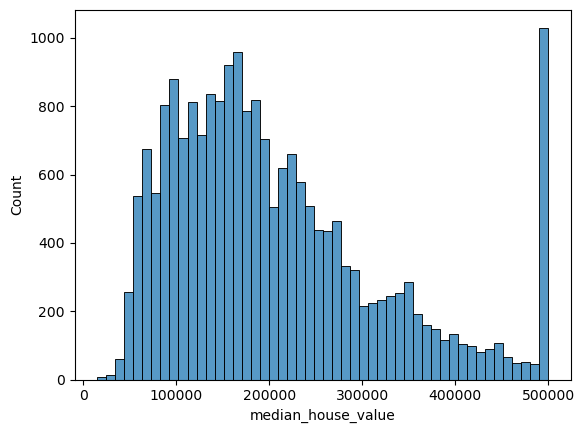

In [103]:
import matplotlib
import seaborn as sns
import numpy as np

sns.histplot(data=df, x='median_house_value', bins=50)

<Axes: xlabel='logged_price', ylabel='Count'>

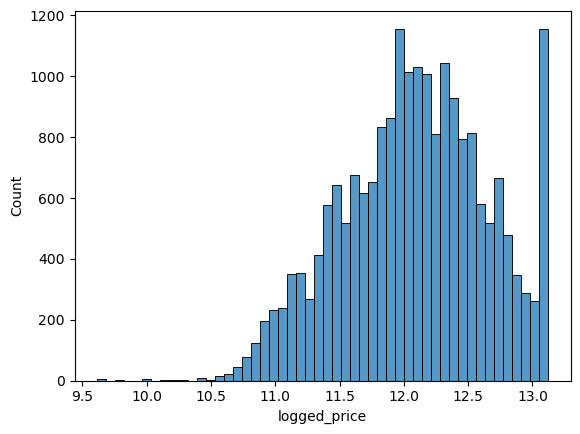

In [104]:
df = df.copy()
df['logged_price'] = np.log(df['median_house_value'].values)
sns.histplot(data=df, x='logged_price', bins=50)

The output variable does not seem to have a long tail problem. Although, it does seem that the outcome is right skewed. 

# Preparing the dataset
For this homework, we only want to use a subset of data.

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

Next, use only the following columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'

In [105]:
df_filtered = df[df['ocean_proximity'].str.contains(r'<1H OCEAN|INLAND', case=False)]

In [106]:
df.shape, df_filtered.shape

((20640, 11), (15687, 11))

In [107]:
df_filtered = df_filtered[['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]

In [108]:
df_filtered.head(5)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


# Question 1
There's one feature with missing values. What is it?

In [109]:
df_filtered.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Question 2
What's the median (50% percentile) for variable 'population'?

In [110]:
df_filtered['population'].median()

1195.0

# Prepare and split the dataset
1) Shuffle the dataset (the filtered one you created above), use seed 42.
2) Split your data in train/val/test sets, with 60%/20%/20% distribution.
3) Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [286]:
n = len(df_filtered)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n, n_val + n_test + n_train

(15687, 15687)

In [287]:
# Shuffle dataset
idx=np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
df_shuffled = df_filtered.iloc[idx]

In [288]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val= df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [289]:
def apply_log_1p(df, col):
    return np.log1p(df[col].values)   

In [290]:
col= 'median_house_value'
df_train[col] = apply_log_1p(df_train, col)
df_val[col] = apply_log_1p(df_val, col)
df_test[col] = apply_log_1p(df_test, col)

In [291]:
df_train[col].head(5), df_val[col].head(5), df_test[col].head(5)

(19963    11.161963
 5929     12.321635
 11377    12.471896
 6443     12.359227
 17546    12.574531
 Name: median_house_value, dtype: float64,
 9235     11.309597
 11104    12.273269
 7428     11.952476
 19928    11.381689
 15534    12.157413
 Name: median_house_value, dtype: float64,
 11959    11.909693
 1257     12.167337
 18438    12.393386
 15069    11.823354
 16227    11.394153
 Name: median_house_value, dtype: float64)

In [292]:
train_target = df_train['median_house_value'].copy()
val_target = df_val['median_house_value'].copy()
test_target = df_test['median_house_value'].copy()
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']


# Question 3
1) We need to deal with missing values for the column from Q1.
2) We have two options: fill it with 0 or with the mean of this variable.
3) Try both options. For each, train a linear regression model without regularization using the code from the lessons.
4) For computing the mean, use the training only!
5) Use the validation dataset to evaluate the models and compare the RMSE of each option.
6) Round the RMSE scores to 2 decimal digits using round(score, 2)
7) Which option gives better RMSE?

In [293]:
def fill_missing_values(df, col, fill_value):
    df = df.copy()
    df[col] = df[col].fillna(fill_value)
    return df

mean_val= df_train['total_bedrooms'].mean()
col = 'total_bedrooms'
df_train_option1 = fill_missing_values(df_train, col, 0) 
df_train_option2 = fill_missing_values(df_train, col, mean_val) 
df_val_option1 =  fill_missing_values(df_val, col, 0) 
df_val_option2 =  fill_missing_values(df_val, col, mean_val) 

In [294]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XT = X.T
    XTX = XT.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(XT).dot(y)
    return w[0], w[1:]

In [295]:
def prediction(X, w0, w):
    y = w0 + X.dot(w)
    return y

In [296]:
def calc_rmse(y_pred, y_orig):
    yp = y_pred.copy()
    yo = y_orig.copy()
    y_diff = yp - yo
    mse = (y_diff ** 2).mean()
    return np.round(np.sqrt(mse),2)

In [299]:
X1=df_train_option1.values
y1=train_target.values
w1_0, w1 = train_linear_regression(X1, y1)
X1_val = df_val_option1.values
y1_val = val_target.values
y1_pred=prediction(X1_val, w1_0, w1)
rmse1 = calc_rmse(y1_pred, y1_val)
rmse1, w1_0, w1

(0.34,
 -9.763249477929213,
 array([-2.68233309e-01, -2.55938802e-01,  1.77710730e-03, -3.38393956e-05,
         2.93766352e-04, -1.52190447e-04,  3.96908643e-04,  1.80600946e-01]))

In [300]:
X2=df_train_option2.values
y2=train_target.values
w2_0, w2 = train_linear_regression(X2, y2)
X2_val = df_val_option2.values
y2_val = val_target.values
y2_pred=prediction(X2_val, w2_0, w2)
rmse2 = calc_rmse(y2_pred, y2_val)
rmse2, w2_0, w2

(0.34,
 -9.886133215861097,
 array([-2.68652914e-01, -2.57026361e-01,  1.79880767e-03, -3.87631029e-05,
         3.78806885e-04, -1.49641599e-04,  3.25344392e-04,  1.81951358e-01]))

# Question 4
Now let's train a regularized linear regression.
1) For this question, fill the NAs with 0.
2) Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
3) Use RMSE to evaluate the model on the validation dataset.
4) Round the RMSE scores to 2 decimal digits.
5) Which r gives the best RMSE?
6) If there are multiple options, select the smallest r.

In [301]:
def train_linear_regression_with_r(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XT = X.T
    XTX = XT.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(XT).dot(y)
    return w[0], w[1:]

In [302]:
col = 'total_bedrooms'
train_dataset = fill_missing_values(df_train, col, 0)
val_dataset = fill_missing_values(df_val, col, 0)
X_train = train_dataset.values
y_train = train_target.values
X_val = val_dataset.values
y_val = val_target.values

reg_params=[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

for r in reg_params: 
    w0, w = train_linear_regression_with_r(X_train, y_train,r)
    y_pred = prediction(X_val, w0, w)
    rm_se = calc_rmse(y_pred, y_val)
    print(f'RMSE for r={r} is:', rm_se)

RMSE for r=0 is: 0.34
RMSE for r=1e-06 is: 0.34
RMSE for r=0.0001 is: 0.34
RMSE for r=0.001 is: 0.34
RMSE for r=0.01 is: 0.34
RMSE for r=0.1 is: 0.34
RMSE for r=1 is: 0.34
RMSE for r=5 is: 0.35
RMSE for r=10 is: 0.35


# Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

1) Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
2) For each seed, do the train/validation/test split with 60%/20%/20% distribution.
3) Fill the missing values with 0 and train a model without regularization.
4) For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
5) What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
6) Round the result to 3 decimal digits (round(std, 3))
7) What's the value of std?

In [310]:
def shuffle_data(seed_val):  
    np.random.seed(seed_val)
    np.random.shuffle(idx)
    df_s = df_filtered.iloc[idx]
    df_tr = df_s.iloc[:n_train].copy()
    df_v = df_s.iloc[n_train:n_train+n_val].copy()
    col= 'median_house_value'
    df_tr[col] = apply_log_1p(df_tr, col)
    df_v[col] = apply_log_1p(df_v, col)
    tr_outcome = df_tr['median_house_value'].copy()
    v_outcome = df_v['median_house_value'].copy()
    del df_tr['median_house_value']
    del df_v['median_house_value']
    col = 'total_bedrooms'
    df_tr = fill_missing_values(df_tr, col, 0)
    df_v = fill_missing_values(df_v, col, 0)
    return df_tr, tr_outcome, df_v, v_outcome

In [311]:
seed_params =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse = []

for s in seed_params: 
    train_dataset, train_outcome, val_dataset, val_outcome = shuffle_data(s)
    X_train = train_dataset.values
    y_train = train_outcome.values
    X_val = val_dataset.values
    y_val = val_outcome.values
    w0, w = train_linear_regression(X_train, y_train)
    y_pred = prediction(X_val, w0, w)
    rm_se = calc_rmse(y_pred, y_val)
    rmse.append(rm_se)
    print(f'RMSE for seed={s} is:', rm_se)

RMSE for seed=0 is: 0.33
RMSE for seed=1 is: 0.34
RMSE for seed=2 is: 0.33
RMSE for seed=3 is: 0.34
RMSE for seed=4 is: 0.34
RMSE for seed=5 is: 0.33
RMSE for seed=6 is: 0.34
RMSE for seed=7 is: 0.35
RMSE for seed=8 is: 0.33
RMSE for seed=9 is: 0.34


In [314]:
std=np.round(np.std(rmse),3)
std

0.006

# Question 6
1) Split the dataset like previously, use seed 9.
2) Combine train and validation datasets.
3) Fill the missing values with 0 and train a model with r=0.001.
4) What's the RMSE on the test dataset?

In [325]:
train_dataset, train_outcome, val_dataset, val_outcome = shuffle_data(seed_val=9)
combined_dataset = pd.concat([train_dataset, val_dataset])
combined_outcome = pd.concat([train_outcome, val_outcome])
X_train = combined_dataset.values
y_train = combined_outcome.values
df_test=fill_missing_values(df_test, col, 0)
X_test = df_test.values
y_test = test_target.values
w0, w = train_linear_regression_with_r(X_train, y_train, r=0.001)
y_pred = prediction(X_test, w0, w)
rm_se = calc_rmse(y_pred, y_test)
print(f'RMSE for seed=9 is:', rm_se)

RMSE for seed=9 is: 0.33
